In [ ]:
#import the dataset
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other
 65% 25.0M/38.2M [00:00<00:00, 41.3MB/s]
100% 38.2M/38.2M [00:00<00:00, 58.7MB/s]


In [ ]:
!unzip /content/usa-real-estate-dataset.zip

Archive:  /content/usa-real-estate-dataset.zip
  inflating: realtor-data.zip.csv    


In [ ]:
!ls /content/

#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

realtor-data.zip.csv  sample_data  usa-real-estate-dataset.zip


In [ ]:
real_estate = pd.read_csv('/content/realtor-data.zip.csv')

# Looking at the Dataframe

real_estate_df = pd.DataFrame(real_estate)
real_estate_df

# check for null values
real_estate_df.isnull().sum()

real_estate_df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

Now how do we figure out how to narrow it down to only one specific state?


In [ ]:

real_estateV2 = real_estate_df.dropna()

real_estateV2

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [ ]:
real_estate_df2 = real_estateV2

In [ ]:
real_estateV2["prev_sold_date"].isnull().sum()

# Convert object types to strings
columns_to_convert = ["status", "city", "state"]

for col in columns_to_convert:
    real_estateV2[col] = real_estateV2[col].astype("string")

real_estateV2["prev_sold_date"] = pd.to_datetime(real_estateV2["prev_sold_date"])

In [ ]:
#While some of the information is needed we decides as a group that a few of these ones need to be dropped.

real_estateV2 = real_estateV2.drop(columns={"street"}, axis=1)
real_estateV2 = real_estateV2.reset_index(drop=True)
real_estateV2

KeyError: "['street'] not found in axis"

In [ ]:
real_estateV2 = real_estateV2.drop(columns={"brokered_by"}, axis=1)
real_estateV2 = real_estateV2.reset_index(drop=True)
real_estateV2

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
0,for_sale,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
1,for_sale,950000.0,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2,for_sale,6899000.0,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3,for_sale,525000.0,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
4,for_sale,289900.0,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
...,...,...,...,...,...,...,...,...,...,...
1084904,sold,359900.0,4.0,2.0,0.33,Richland,Washington,99354.0,3600.0,2022-03-25
1084905,sold,350000.0,3.0,2.0,0.10,Richland,Washington,99354.0,1616.0,2022-03-25
1084906,sold,440000.0,6.0,3.0,0.50,Richland,Washington,99354.0,3200.0,2022-03-24
1084907,sold,179900.0,2.0,1.0,0.09,Richland,Washington,99354.0,933.0,2022-03-24


In [ ]:
Colorado_houses = real_estateV2[real_estateV2["state"] == "Colorado"]

In [ ]:
Colorado_houses.sort_values('zip_code')
Colorado_houses


,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
55812,for_sale,489900.0,3.0,3.0,0.05,Centennial,Colorado,80122.0,2376.0,2002-09-09
295611,for_sale,300000.0,3.0,3.0,0.16,Burlington,Colorado,80807.0,1920.0,2018-05-15
295612,for_sale,96500.0,2.0,1.0,0.16,Burlington,Colorado,80807.0,816.0,2013-02-22
295613,for_sale,129500.0,2.0,1.0,0.24,Burlington,Colorado,80807.0,1466.0,1990-04-04
295614,for_sale,155000.0,2.0,2.0,0.14,Wray,Colorado,80758.0,2126.0,2014-06-12
...,...,...,...,...,...,...,...,...,...,...
898536,sold,162900.0,2.0,2.0,39.40,Westcliffe,Colorado,81252.0,1056.0,2022-02-25
898537,sold,319900.0,3.0,3.0,0.12,Canon City,Colorado,81212.0,1398.0,2022-02-25
898538,sold,294900.0,4.0,2.0,0.19,Canon City,Colorado,81212.0,1688.0,2022-02-25
898540,sold,249900.0,3.0,2.0,0.11,Grand Junction,Colorado,81504.0,1026.0,2021-12-29


In [ ]:
# sort the houses by zip code, I wanted to find the prices by area (kinda gave up on this idea for the time being)

Colorado_houses.sort_values('zip_code') # Sort the dataframe by the values in the zip_code column


,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
352598,for_sale,545000.0,3.0,2.0,0.16,Arvada,Colorado,80002.0,1336.0,2015-12-16
352582,for_sale,574900.0,3.0,1.0,0.14,Arvada,Colorado,80002.0,944.0,2016-10-27
352583,for_sale,600000.0,3.0,2.0,0.40,Arvada,Colorado,80002.0,1727.0,2017-03-28
352584,for_sale,835000.0,3.0,3.0,0.19,Arvada,Colorado,80002.0,3193.0,2016-04-26
352585,for_sale,825000.0,4.0,3.0,0.20,Arvada,Colorado,80002.0,2817.0,2018-08-02
...,...,...,...,...,...,...,...,...,...,...
358713,for_sale,280000.0,3.0,4.0,0.02,Vail,Colorado,81657.0,1997.0,2021-12-21
359185,for_sale,3650000.0,2.0,3.0,0.01,Vail,Colorado,81657.0,1493.0,2015-06-11
359103,for_sale,775000.0,3.0,3.0,0.11,Vail,Colorado,81657.0,1604.0,2004-03-09
359192,for_sale,799000.0,3.0,3.0,0.05,Vail,Colorado,81657.0,1225.0,2018-10-18


In [ ]:
#sorted for sale values
for_sale = Colorado_houses[Colorado_houses["status"] == "for_sale"]
for_sale

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
55812,for_sale,489900,3.0,3.0,0.05,Centennial,Colorado,80122.0,2376.0,2002-09-09
295611,for_sale,300000,3.0,3.0,0.16,Burlington,Colorado,80807.0,1920.0,2018-05-15
295612,for_sale,96500,2.0,1.0,0.16,Burlington,Colorado,80807.0,816.0,2013-02-22
295613,for_sale,129500,2.0,1.0,0.24,Burlington,Colorado,80807.0,1466.0,1990-04-04
295614,for_sale,155000,2.0,2.0,0.14,Wray,Colorado,80758.0,2126.0,2014-06-12
...,...,...,...,...,...,...,...,...,...,...
364155,for_sale,334700,4.0,2.0,1.20,Collbran,Colorado,81624.0,2112.0,2019-03-15
364156,for_sale,699900,3.0,2.0,93.21,Collbran,Colorado,81624.0,3250.0,2016-01-06
364157,for_sale,474900,3.0,3.0,1.88,Collbran,Colorado,81624.0,1845.0,2020-08-03
364158,for_sale,320000,3.0,2.0,0.27,Collbran,Colorado,81624.0,1723.0,2021-08-30


In [ ]:
for_sale = for_sale[for_sale["price"] < 400000]
for_sale = for_sale[for_sale["bed"] < 7.0]

(0.0, 7.0)

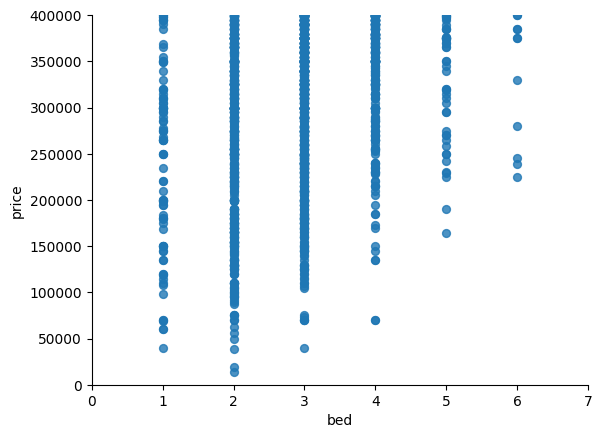

In [ ]:
#houses for sale in Colorado
for_sale.plot(kind='scatter', x='bed', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylim(0, 400000)
plt.xlim(0, 7)

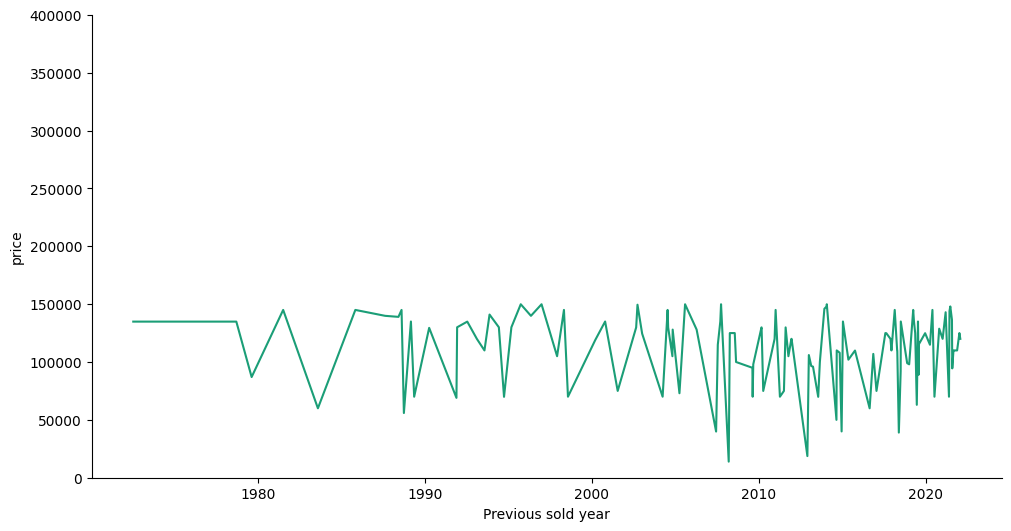

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['prev_sold_date']
  ys = series['price']
  plt.ylim(0, 400000)
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('prev_sold_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Previous sold year')
_ = plt.ylabel('price')

In [ ]:
 for_sale[for_sale["bed"] < 8.0]

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
55812,for_sale,489900.0,3.0,3.0,0.05,Centennial,Colorado,80122.0,2376.0,2002-09-09
295611,for_sale,300000.0,3.0,3.0,0.16,Burlington,Colorado,80807.0,1920.0,2018-05-15
295612,for_sale,96500.0,2.0,1.0,0.16,Burlington,Colorado,80807.0,816.0,2013-02-22
295613,for_sale,129500.0,2.0,1.0,0.24,Burlington,Colorado,80807.0,1466.0,1990-04-04
295614,for_sale,155000.0,2.0,2.0,0.14,Wray,Colorado,80758.0,2126.0,2014-06-12
...,...,...,...,...,...,...,...,...,...,...
364155,for_sale,334700.0,4.0,2.0,1.20,Collbran,Colorado,81624.0,2112.0,2019-03-15
364156,for_sale,699900.0,3.0,2.0,93.21,Collbran,Colorado,81624.0,3250.0,2016-01-06
364157,for_sale,474900.0,3.0,3.0,1.88,Collbran,Colorado,81624.0,1845.0,2020-08-03
364158,for_sale,320000.0,3.0,2.0,0.27,Collbran,Colorado,81624.0,1723.0,2021-08-30


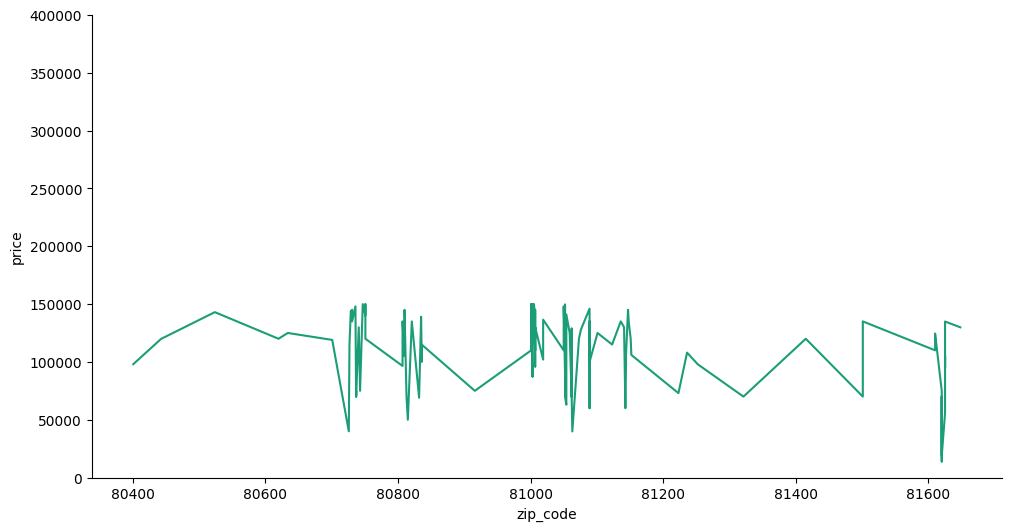

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['zip_code']
  ys = series['price']
  plt.ylim(0, 400000)
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('zip_code', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('zip_code')
_ = plt.ylabel('price')

In [ ]:
for_sale = for_sale[for_sale["acre_lot"] < 100]
for_sale


,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
295611,for_sale,300000,3.0,3.0,0.16,Burlington,Colorado,80807.0,1920.0,2018-05-15
295612,for_sale,96500,2.0,1.0,0.16,Burlington,Colorado,80807.0,816.0,2013-02-22
295613,for_sale,129500,2.0,1.0,0.24,Burlington,Colorado,80807.0,1466.0,1990-04-04
295614,for_sale,155000,2.0,2.0,0.14,Wray,Colorado,80758.0,2126.0,2014-06-12
295615,for_sale,135000,2.0,1.0,0.08,Burlington,Colorado,80807.0,1064.0,1989-03-01
...,...,...,...,...,...,...,...,...,...,...
363881,for_sale,319000,3.0,1.0,0.10,Silt,Colorado,81652.0,1070.0,2019-09-16
364154,for_sale,169900,2.0,1.0,0.63,Collbran,Colorado,81624.0,960.0,2002-05-07
364155,for_sale,334700,4.0,2.0,1.20,Collbran,Colorado,81624.0,2112.0,2019-03-15
364158,for_sale,320000,3.0,2.0,0.27,Collbran,Colorado,81624.0,1723.0,2021-08-30


(0.0, 900000.0)

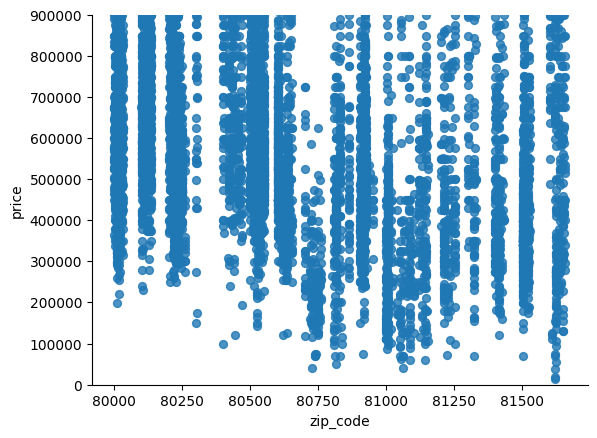

In [ ]:
#houses for sale in Colorado
for_sale.plot(kind='scatter', x='zip_code', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylim(0, 900000)


In [ ]:
# list all the zipcodes

for_sale['zip_code'].unique()

zip_code_counts = Colorado_houses["zip_code"].value_counts()
print(zip_code_counts)

# retried using zip codes but eneded up getting annoyed

zip_code
80634.0    445
80550.0    421
80504.0    300
80538.0    291
81007.0    223
          ... 
81220.0      1
81024.0      1
81041.0      1
80535.0      1
80809.0      1
Name: count, Length: 428, dtype: int64
